In [1]:
!pip install python-docx
!pip install pdfplumber
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install nltk


   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.0 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.0 MB 2.0 MB/s eta 0:00:02
   ------------- -------------------------- 1.3/4.0 MB 2.2 MB/s eta 0:00:02
   ------------------ --------------------- 1.8/4.0 MB 2.3 MB/s eta 0:00:01
   -------------------------- ------------- 2.6/4.0 MB 2.6 MB/s eta 0:00:01
   --------------------------------- ------ 3.4/4.0 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 3.0 MB/s  0:00:01

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [p

In [2]:
pdf_text = read_pdf("UmaTakbhate_Resumepdf.pdf")

NameError: name 'read_pdf' is not defined

In [3]:
import pdfplumber

def read_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text


In [4]:
pdf_text = read_pdf("UmaTakbhate_Resumepdf.pdf")

In [5]:
print(pdf_text[:500]) 

GRE-298 || TOEFL- 87
Linkedin:https://www.linkedin.com/in/u Uma Anand Takbhate Email: utakbhate0943@sdsu.edu
ma-t-40992858/ Contact No. : +1 858 3773637
Summary:
➢ 8+ years of extensive experience in BI reports developments, story telling with business data to Business folks and admin work
➢ Experienced on Pharma, retail, store reporting, e-commerce, hospitality, mergers and acquisitions businesses.
➢ Implementation & customizing Microstrategy Reports, Analytics Reports, Environment Change Manag


In [6]:
print(pdf_text[:1000]) 

GRE-298 || TOEFL- 87
Linkedin:https://www.linkedin.com/in/u Uma Anand Takbhate Email: utakbhate0943@sdsu.edu
ma-t-40992858/ Contact No. : +1 858 3773637
Summary:
➢ 8+ years of extensive experience in BI reports developments, story telling with business data to Business folks and admin work
➢ Experienced on Pharma, retail, store reporting, e-commerce, hospitality, mergers and acquisitions businesses.
➢ Implementation & customizing Microstrategy Reports, Analytics Reports, Environment Change Management, Problem
Management through effective Implementation & customizing, mapping work packages.
➢ Experienced on creating visualizations to tell business insights and story
➢ Experienced on creating schema(star), updating schema, creating logical tables, creating and updating schema objects, creating
packages and migration from DEV,QA,PROD
➢ Worked on view definition, ETL processes, data loads with informatica
➢ Proficiency in developing SQL with various relational databases like Oracle, MYSQL,

In [7]:
import re

# Extract email
def extract_email(text):
    email = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)
    return email

# Extract phone number
def extract_phone(text):
    phone = re.findall(r'\+?\d[\d -]{8,}\d', text)
    return phone

# Extract skills (simple example)
def extract_skills(text, skills_list):
    skills_found = [skill for skill in skills_list if skill.lower() in text.lower()]
    return skills_found

# Example usage
skills_list = ["Python", "SQL", "Excel", "Power BI", "Tableau", "Big Data"]
text = pdf_text  # or docx_text

print("Email:", extract_email(text))
print("Phone:", extract_phone(text))
print("Skills:", extract_skills(text, skills_list))


Email: ['utakbhate0943@sdsu.edu']
Phone: ['+1 858 3773637']
Skills: ['SQL', 'Tableau']


In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return names, orgs

names, orgs = extract_entities(text)
print("Names:", names)
print("Organizations:", orgs)


Names: ['Pharma', 'Analytics Reports', 'Oracle', 'Jira ● Strategy', 'Career', 'Migrating', 'Tableau', 'Migrating', 'Microstrategy', 'Developed Tableau']
Organizations: ['Uma Anand Takbhate', 'Implementation &', 'Microstrategy Reports', 'Problem\nManagement', 'Implementation &', 'DEV', 'QA', 'ETL', 'SQL', 'Admin ● Team', 'Tableau Prep ● Problem', 'SSIS', 'Informatica ● Decision making & time management', 'ZS', 'Bayer Pharma', 'Tellius', 'DEV', 'Consultant (Strategy & Analytics', 'Deloitte', 'USI', 'Walt Disney', 'Disney', 'MSTR', 'Disney', 'License Purchase', 'DEV', 'BI Developer Systems Plus Technologies', 'Carter’s Inc Enterprise for Retail, Ecommerce', 'Created', 'LOD', 'Tableau Desktop', 'Business Intelligence', 'Pune University', 'Deloitte USI', "Carter's Inc Enterprise BI"]


In [9]:
cv_data = {
    "Name": names[0] if names else None,
    "Email": extract_email(text),
    "Phone": extract_phone(text),
    "Skills": extract_skills(text, skills_list),
    "Organizations": orgs
}

print(cv_data)


{'Name': 'Pharma', 'Email': ['utakbhate0943@sdsu.edu'], 'Phone': ['+1 858 3773637'], 'Skills': ['SQL', 'Tableau'], 'Organizations': ['Uma Anand Takbhate', 'Implementation &', 'Microstrategy Reports', 'Problem\nManagement', 'Implementation &', 'DEV', 'QA', 'ETL', 'SQL', 'Admin ● Team', 'Tableau Prep ● Problem', 'SSIS', 'Informatica ● Decision making & time management', 'ZS', 'Bayer Pharma', 'Tellius', 'DEV', 'Consultant (Strategy & Analytics', 'Deloitte', 'USI', 'Walt Disney', 'Disney', 'MSTR', 'Disney', 'License Purchase', 'DEV', 'BI Developer Systems Plus Technologies', 'Carter’s Inc Enterprise for Retail, Ecommerce', 'Created', 'LOD', 'Tableau Desktop', 'Business Intelligence', 'Pune University', 'Deloitte USI', "Carter's Inc Enterprise BI"]}


In [10]:
# -----------------------------
# 1️⃣ Install required libraries (run once)
# -----------------------------
!pip install pdfplumber python-docx spacy nltk
!python -m spacy download en_core_web_sm

# -----------------------------
# 2️⃣ Import libraries
# -----------------------------
import pdfplumber
from docx import Document
import re
import spacy
import os

nlp = spacy.load("en_core_web_sm")

# -----------------------------
# 3️⃣ Define functions
# -----------------------------

# Read PDF
def read_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

# Read Word
def read_docx(file_path):
    doc = Document(file_path)
    return "\n".join([para.text for para in doc.paragraphs])

# Extract email
def extract_email(text):
    return re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)

# Extract phone number
def extract_phone(text):
    return re.findall(r'\+?\d[\d -]{8,}\d', text)

# Extract skills
def extract_skills(text, skills_list):
    return [skill for skill in skills_list if skill.lower() in text.lower()]

# Extract names and organizations
def extract_entities(text):
    doc = nlp(text)
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return names, orgs

# Parse single CV
def parse_cv(file_path, skills_list):
    if file_path.endswith(".pdf"):
        text = read_pdf(file_path)
    elif file_path.endswith(".docx"):
        text = read_docx(file_path)
    else:
        return None

    names, orgs = extract_entities(text)
    
    return {
        "File": os.path.basename(file_path),
        "Name": names[0] if names else None,
        "Email": extract_email(text),
        "Phone": extract_phone(text),
        "Skills": extract_skills(text, skills_list),
        "Organizations": orgs
    }

# -----------------------------
# 4️⃣ Example usage (single file)
# -----------------------------
skills_list = ["Python", "SQL", "Excel", "Power BI", "Tableau", "Big Data", "Machine Learning"]

# Replace with your file path
file_path = "UmaTakbhate_Resumepdf.pdf"

cv_info = parse_cv(file_path, skills_list)
print(cv_info)

# -----------------------------
# 5️⃣ Example usage (all CVs in a folder)
# -----------------------------
folder_path = "cv_files"  # Replace with your folder containing CVs
all_cvs = []

for file in os.listdir(folder_path):
    if file.endswith(".pdf") or file.endswith(".docx"):
        cv_data = parse_cv(os.path.join(folder_path, file), skills_list)
        if cv_data:
            all_cvs.append(cv_data)

# Display all parsed CVs
for cv in all_cvs:
    print(cv)


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 2.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2.8 MB/s eta 0:00:05
     ------ --------------------------------- 2.1/12.8 MB 3.0 MB/s eta 0:00:04
     --------- ------------------------------ 2.9/12.8 MB 3.1 MB/s eta 0:00:04
     ----------- ---------------------------- 3.7/12.8 MB 3.2 MB/s eta 0:00:03
     -------------- ------------------------- 4.7/12.8 MB 3.4 MB/s eta 0:00:03
     ------------------ --------------------- 5.8/12.8 MB 3.6 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.8 MB 3.8 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.8 MB 4.0 MB/s eta 0:00:02
     ---------------------------- ----------- 9.2/12.8 MB 4.2 MB/s eta 0:00:01
     --------------------------------- ------ 10.7/12.8 MB 4.5 MB/

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'cv_files'

In [11]:
folder_path = "C:/Users/Uma/Documents/CVs"  # full path to your CV folder


In [12]:
folder_path = "cv_files"

In [13]:
import os

folder_path = "cv_files"

if os.path.exists(folder_path):
    print("Folder exists!")
else:
    print("Folder not found. Current working directory:", os.getcwd())


Folder not found. Current working directory: C:\Users\takbh\BDA696\venv2


In [14]:
folder_path ="C:\Users\takbh\BDA696\venv2\CVs"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3551796325.py, line 1)

In [ ]:
# -----------------------------
# 1️⃣ Import libraries
# -----------------------------
import os
import pdfplumber
from docx import Document
import re
import spacy
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askdirectory

nlp = spacy.load("en_core_web_sm")

# -----------------------------
# 2️⃣ Functions (same as before)
# -----------------------------

# Read PDF
def read_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

# Read Word
def read_docx(file_path):
    doc = Document(file_path)
    return "\n".join([para.text for para in doc.paragraphs])

# Extract email
def extract_email(text):
    return re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)

# Extract phone number
def extract_phone(text):
    return re.findall(r'\+?\d[\d -]{8,}\d', text)

# Extract skills
def extract_skills(text, skills_list):
    return [skill for skill in skills_list if skill.lower() in text.lower()]

# Extract names and organizations
def extract_entities(text):
    doc = nlp(text)
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    orgs = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    return names, orgs

# Parse single CV
def parse_cv(file_path, skills_list):
    if file_path.endswith(".pdf"):
        text = read_pdf(file_path)
    elif file_path.endswith(".docx"):
        text = read_docx(file_path)
    else:
        return None

    names, orgs = extract_entities(text)
    
    return {
        "File": os.path.basename(file_path),
        "Name": names[0] if names else None,
        "Email": ", ".join(extract_email(text)),
        "Phone": ", ".join(extract_phone(text)),
        "Skills": ", ".join(extract_skills(text, skills_list)),
        "Organizations": ", ".join(orgs)
    }

# -----------------------------
# 3️⃣ Ask user to select folder
# -----------------------------
Tk().withdraw()  # Hide Tkinter root window
folder_path = askdirectory(title="Select Folder Containing CVs")
print("Selected folder:", folder_path)

# -----------------------------
# 4️⃣ Parse all CVs in the folder
# -----------------------------
skills_list = ["Python", "SQL", "Excel", "Power BI", "Tableau", "Big Data", "Machine Learning"]
all_cvs = []

for file in os.listdir(folder_path):
    if file.endswith(".pdf") or file.endswith(".docx"):
        cv_data = parse_cv(os.path.join(folder_path, file), skills_list)
        if cv_data:
            all_cvs.append(cv_data)

# -----------------------------
# 5️⃣ Export to Excel and CSV
# -----------------------------
if all_cvs:
    df = pd.DataFrame(all_cvs)
    df.to_excel("parsed_CVs.xlsx", index=False)
    df.to_csv("parsed_CVs.csv", index=False)
    print("✅ Exported parsed CV data to parsed_CVs.xlsx and parsed_CVs.csv")
else:
    print("No CVs found or parsed in the selected folder.")


In [16]:
!pip install pdfplumber spacy scikit-learn
!python -m spacy download en_core_web_sm


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.7 MB 13.7 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 18.0 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 18.5 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -------- ------------------------------- 8.1/38.5 MB 40.0 MB/s eta 0:00:01
   ------------------- -------------------- 18.6/38.5 MB 46.0 MB/s eta 0:00:01
   --------------------------------- ------ 32.2/38.5 MB 52.1 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 50.0 MB/s  0:00:00

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -----------------------

In [17]:
import pdfplumber
import re
import spacy


In [18]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

# Example usage
cv_text = extract_text_from_pdf("UmaTakbhate_Resumepdf.pdf")
print(cv_text[:800])  # preview first 800 chars


GRE-298 || TOEFL- 87
Linkedin:https://www.linkedin.com/in/u Uma Anand Takbhate Email: utakbhate0943@sdsu.edu
ma-t-40992858/ Contact No. : +1 858 3773637
Summary:
➢ 8+ years of extensive experience in BI reports developments, story telling with business data to Business folks and admin work
➢ Experienced on Pharma, retail, store reporting, e-commerce, hospitality, mergers and acquisitions businesses.
➢ Implementation & customizing Microstrategy Reports, Analytics Reports, Environment Change Management, Problem
Management through effective Implementation & customizing, mapping work packages.
➢ Experienced on creating visualizations to tell business insights and story
➢ Experienced on creating schema(star), updating schema, creating logical tables, creating and updating schema objects, creati


In [19]:
skills_list = [
    "Python", "SQL", "Machine Learning", "Tableau", "Excel",
    "Big Data", "Spark", "AWS", "Java", "C++", "Power BI",
    "Data Analysis", "Hadoop", "Azure", "R", "Scala"
]

def extract_skills(text, skills_list):
    found_skills = []
    for skill in skills_list:
        pattern = r"\b" + re.escape(skill) + r"\b"
        if re.search(pattern, text, re.IGNORECASE):
            found_skills.append(skill)
    return list(set(found_skills))

cv_skills = extract_skills(cv_text, skills_list)
print("Extracted CV Skills:", cv_skills)


Extracted CV Skills: ['SQL', 'Azure', 'Tableau']


In [20]:
def extract_experience(text):
    exp_pattern = r"(\d+)\+?\s*(?:years|yrs)"
    matches = re.findall(exp_pattern, text, re.IGNORECASE)
    return [int(m) for m in matches]

cv_experience = extract_experience(cv_text)
print("Extracted Experience Mentions:", cv_experience)


Extracted Experience Mentions: [8]


In [21]:
job_listing_text = """
We are looking for a Data Analyst with skills in Python, SQL, Tableau, and AWS.
Minimum 3 years of experience required.
"""

job_skills = extract_skills(job_listing_text, skills_list)
job_experience = extract_experience(job_listing_text)

print("Job Skills:", job_skills)
print("Job Experience:", job_experience)

# Skill matching
matched_skills = set(cv_skills).intersection(set(job_skills))
skill_match_ratio = len(matched_skills) / len(job_skills) if job_skills else 0

print(f"\nMatched Skills: {matched_skills}")
print(f"Skill Match Ratio: {skill_match_ratio:.2f}")


Job Skills: ['Python', 'AWS', 'SQL', 'Tableau']
Job Experience: [3]

Matched Skills: {'SQL', 'Tableau'}
Skill Match Ratio: 0.50


In [22]:
nlp = spacy.load("en_core_web_sm")

def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

cv_entities = extract_named_entities(cv_text)
print(cv_entities[:20])  # preview


[('87', 'CARDINAL'), ('Uma Anand Takbhate', 'ORG'), ('858 3773637', 'DATE'), ('8+ years', 'DATE'), ('BI', 'GPE'), ('Pharma', 'PERSON'), ('Implementation &', 'ORG'), ('Microstrategy Reports', 'ORG'), ('Analytics Reports', 'PERSON'), ('Problem\nManagement', 'ORG'), ('Implementation &', 'ORG'), ('DEV', 'ORG'), ('QA', 'ORG'), ('ETL', 'ORG'), ('SQL', 'ORG'), ('Oracle', 'NORP'), ('Admin ● Team', 'ORG'), ('Tableau Prep ● Problem', 'ORG'), ('SSIS', 'ORG'), ('Informatica ● Decision making & time management', 'ORG')]


In [23]:
!pip install matplotlib seaborn


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_skill_match_matrix(cv_skills, job_skills):
    # Union of all skills
    all_skills = list(set(job_skills + cv_skills))
    
    # Build matrix
    data = {
        "Job Requirement": [1 if skill in job_skills else 0 for skill in all_skills],
        "CV Match": [1 if skill in cv_skills else 0 for skill in all_skills]
    }
    df = pd.DataFrame(data, index=all_skills)
    return df

# Example
skill_match_df = create_skill_match_matrix(cv_skills, job_skills)
print(skill_match_df)


         Job Requirement  CV Match
Python                 1         0
Azure                  0         1
SQL                    1         1
AWS                    1         0
Tableau                1         1


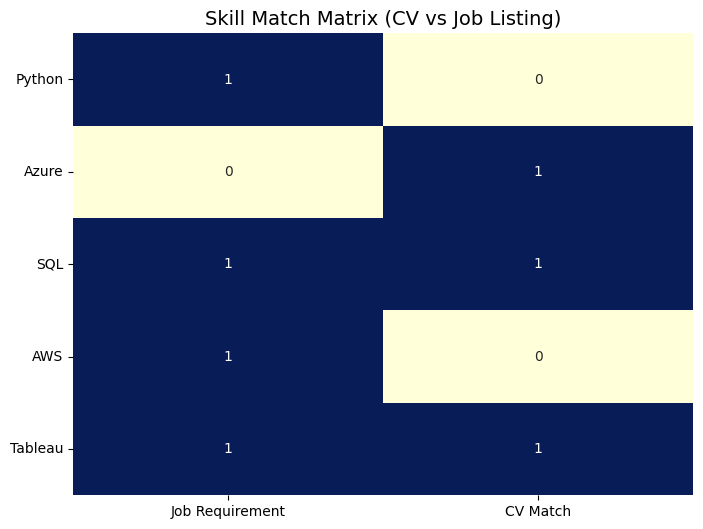

In [25]:
def plot_skill_match_heatmap(skill_match_df):
    plt.figure(figsize=(8, 6))
    sns.heatmap(skill_match_df, annot=True, cmap="YlGnBu", cbar=False, fmt="d")
    plt.title("Skill Match Matrix (CV vs Job Listing)", fontsize=14)
    plt.yticks(rotation=0)  # keep skill names readable
    plt.show()

plot_skill_match_heatmap(skill_match_df)


In [26]:
def calculate_match_score(cv_skills, job_skills):
    matched_skills = set(cv_skills).intersection(set(job_skills))
    score = len(matched_skills) / len(job_skills) if job_skills else 0
    return score, matched_skills


In [27]:
def plot_match_score(score):
    fig, ax = plt.subplots(figsize=(6, 1.5))
    ax.barh([0], [score*100], color="seagreen")
    ax.barh([0], [100], color="lightgray", alpha=0.3)  # background
    
    ax.set_xlim(0, 100)
    ax.set_yticks([])
    ax.set_xticks(range(0, 101, 20))
    ax.set_title("CV → Job Skill Match Score", fontsize=14, pad=10)
    ax.text(score*100/2, 0, f"{score*100:.1f}%", ha="center", va="center", fontsize=12, color="white", weight="bold")
    plt.show()


Matched Skills: {'SQL', 'Tableau'}
Skill Match Score: 50.0%


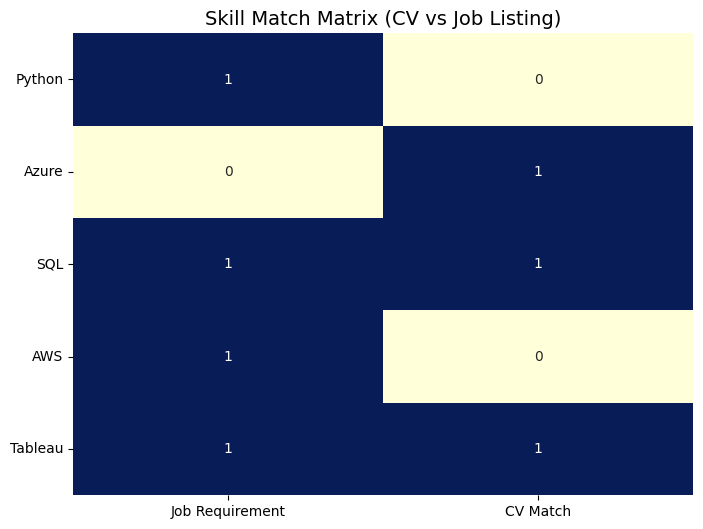

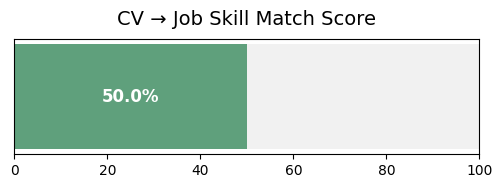

In [28]:
# Get match score
score, matched_skills = calculate_match_score(cv_skills, job_skills)

print("Matched Skills:", matched_skills)
print(f"Skill Match Score: {score*100:.1f}%")

# Plot heatmap
skill_match_df = create_skill_match_matrix(cv_skills, job_skills)
plot_skill_match_heatmap(skill_match_df)

# Plot progress bar
plot_match_score(score)
